# **Q-Learning x Deep Q-Learning for Mountain Car Environment**

In [1]:
from QLearning import QLearningMountain
import gymnasium as gym

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from tqdm import tqdm
from collections import deque

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

from DeepQLearningTorch import DeepQLearning
import csv

# **1. Training Q-Learning**

Let's train for 5 experiments with the best hyperparameters found in the previous activity.

In [3]:
env = gym.make('MountainCar-v0')

(state,_) = env.reset()

print('State space: ', env.observation_space)
print('Action space: ', env.action_space)

print(env.observation_space.low)
print(env.observation_space.high)

State space:  Box([-1.2  -0.07], [0.6  0.07], (2,), float32)
Action space:  Discrete(3)
[-1.2  -0.07]
[0.6  0.07]


In [4]:
PARAMS = {
    'alpha':0.1,
    'gamma':0.99, 
    'epsilon':1.0,
    'eps_min':0.01, 
    'eps_dec':0.995,
}

EPISODES = 10000
N_EXPERIMENTS = 5
MAX_ACTIONS = 500 # That is more than the default value for the MountainCar-v0 environment in gymnasium (200)

In [8]:
q_learning_res = []

for experiment in tqdm(range(N_EXPERIMENTS)):

    env = gym.make('MountainCar-v0').env

    q_learning_agent = QLearningMountain(env, **PARAMS)

    curr_q_table, curr_rewards_per_episode = q_learning_agent.fit(episodes=EPISODES, max_steps=MAX_ACTIONS, verbose=True)

    q_learning_agent.log(folder="logs/q_learning_mountain", prefix=f"exp_{experiment}")

    q_learning_res.append(curr_rewards_per_episode)

  0%|          | 0/5 [00:00<?, ?it/s]

Episódio 0, Recompensa acumulada média dos últimos 100 episódios: -500.0
Episódio 100, Recompensa acumulada média dos últimos 100 episódios: -499.13
Episódio 200, Recompensa acumulada média dos últimos 100 episódios: -496.18
Episódio 300, Recompensa acumulada média dos últimos 100 episódios: -437.96
Episódio 400, Recompensa acumulada média dos últimos 100 episódios: -286.09
Episódio 500, Recompensa acumulada média dos últimos 100 episódios: -264.04
Episódio 600, Recompensa acumulada média dos últimos 100 episódios: -360.51
Episódio 700, Recompensa acumulada média dos últimos 100 episódios: -276.09
Episódio 800, Recompensa acumulada média dos últimos 100 episódios: -227.73
Episódio 900, Recompensa acumulada média dos últimos 100 episódios: -201.55
Episódio 1000, Recompensa acumulada média dos últimos 100 episódios: -206.6
Episódio 1100, Recompensa acumulada média dos últimos 100 episódios: -217.32
Episódio 1200, Recompensa acumulada média dos últimos 100 episódios: -204.53
Episódio 1300

 20%|██        | 1/5 [00:35<02:21, 35.48s/it]

Episódio 9900, Recompensa acumulada média dos últimos 100 episódios: -229.74
Episódio 0, Recompensa acumulada média dos últimos 100 episódios: -500.0
Episódio 100, Recompensa acumulada média dos últimos 100 episódios: -499.62
Episódio 200, Recompensa acumulada média dos últimos 100 episódios: -487.58
Episódio 300, Recompensa acumulada média dos últimos 100 episódios: -400.1
Episódio 400, Recompensa acumulada média dos últimos 100 episódios: -365.76
Episódio 500, Recompensa acumulada média dos últimos 100 episódios: -277.52
Episódio 600, Recompensa acumulada média dos últimos 100 episódios: -234.6
Episódio 700, Recompensa acumulada média dos últimos 100 episódios: -267.24
Episódio 800, Recompensa acumulada média dos últimos 100 episódios: -306.16
Episódio 900, Recompensa acumulada média dos últimos 100 episódios: -227.88
Episódio 1000, Recompensa acumulada média dos últimos 100 episódios: -236.31
Episódio 1100, Recompensa acumulada média dos últimos 100 episódios: -217.73
Episódio 1200,

 40%|████      | 2/5 [01:11<01:47, 35.84s/it]

Episódio 9900, Recompensa acumulada média dos últimos 100 episódios: -224.13
Episódio 0, Recompensa acumulada média dos últimos 100 episódios: -500.0
Episódio 100, Recompensa acumulada média dos últimos 100 episódios: -499.36
Episódio 200, Recompensa acumulada média dos últimos 100 episódios: -477.93
Episódio 300, Recompensa acumulada média dos últimos 100 episódios: -395.99
Episódio 400, Recompensa acumulada média dos últimos 100 episódios: -326.31
Episódio 500, Recompensa acumulada média dos últimos 100 episódios: -253.54
Episódio 600, Recompensa acumulada média dos últimos 100 episódios: -332.21
Episódio 700, Recompensa acumulada média dos últimos 100 episódios: -317.07
Episódio 800, Recompensa acumulada média dos últimos 100 episódios: -242.12
Episódio 900, Recompensa acumulada média dos últimos 100 episódios: -222.58
Episódio 1000, Recompensa acumulada média dos últimos 100 episódios: -204.98
Episódio 1100, Recompensa acumulada média dos últimos 100 episódios: -199.98
Episódio 120

 60%|██████    | 3/5 [01:47<01:12, 36.05s/it]

Episódio 0, Recompensa acumulada média dos últimos 100 episódios: -500.0
Episódio 100, Recompensa acumulada média dos últimos 100 episódios: -500.0
Episódio 200, Recompensa acumulada média dos últimos 100 episódios: -478.37
Episódio 300, Recompensa acumulada média dos últimos 100 episódios: -434.49
Episódio 400, Recompensa acumulada média dos últimos 100 episódios: -373.97
Episódio 500, Recompensa acumulada média dos últimos 100 episódios: -278.9
Episódio 600, Recompensa acumulada média dos últimos 100 episódios: -255.26
Episódio 700, Recompensa acumulada média dos últimos 100 episódios: -283.68
Episódio 800, Recompensa acumulada média dos últimos 100 episódios: -348.94
Episódio 900, Recompensa acumulada média dos últimos 100 episódios: -262.15
Episódio 1000, Recompensa acumulada média dos últimos 100 episódios: -217.03
Episódio 1100, Recompensa acumulada média dos últimos 100 episódios: -200.57
Episódio 1200, Recompensa acumulada média dos últimos 100 episódios: -206.54
Episódio 1300,

 80%|████████  | 4/5 [02:23<00:36, 36.07s/it]

Episódio 0, Recompensa acumulada média dos últimos 100 episódios: -500.0
Episódio 100, Recompensa acumulada média dos últimos 100 episódios: -498.22
Episódio 200, Recompensa acumulada média dos últimos 100 episódios: -467.44
Episódio 300, Recompensa acumulada média dos últimos 100 episódios: -439.76
Episódio 400, Recompensa acumulada média dos últimos 100 episódios: -398.02
Episódio 500, Recompensa acumulada média dos últimos 100 episódios: -329.6
Episódio 600, Recompensa acumulada média dos últimos 100 episódios: -300.95
Episódio 700, Recompensa acumulada média dos últimos 100 episódios: -266.14
Episódio 800, Recompensa acumulada média dos últimos 100 episódios: -248.93
Episódio 900, Recompensa acumulada média dos últimos 100 episódios: -222.53
Episódio 1000, Recompensa acumulada média dos últimos 100 episódios: -209.48
Episódio 1100, Recompensa acumulada média dos últimos 100 episódios: -206.17
Episódio 1200, Recompensa acumulada média dos últimos 100 episódios: -208.84
Episódio 1300

100%|██████████| 5/5 [03:00<00:00, 36.19s/it]

Episódio 9800, Recompensa acumulada média dos últimos 100 episódios: -213.3
Episódio 9900, Recompensa acumulada média dos últimos 100 episódios: -161.43


In [10]:
total_results = {"Q-Learning": q_learning_res}

/tmp/ipykernel_63800/1160025371.py:28: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(


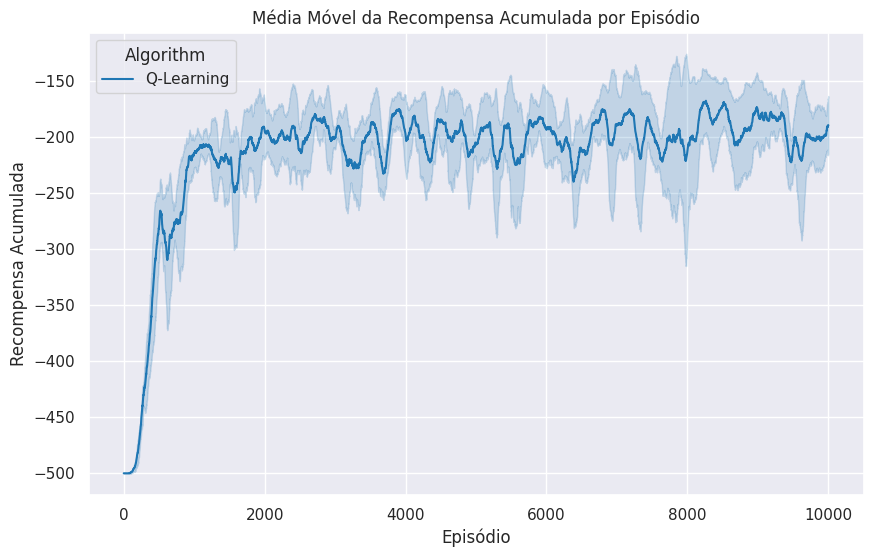

In [11]:
rolling_window = 100  # Média móvel de 100 episódios para deixar o gráfico mais suave

plot_data = []

for algorithm, runs in total_results.items():
    num_runs = len(runs)
    num_timesteps = len(runs[0])
    
    # Monta um dataframe com os resultados de cada episódio para cada algoritmo para ser mais fácil de plotar
    for run_idx in range(num_runs):
        for timestep in range(len(runs[run_idx])):
            plot_data.append({
                "Algorithm": algorithm,
                "Run": run_idx,
                "Timestep": timestep,
                "Value": runs[run_idx][timestep]
            })

df = pd.DataFrame(plot_data)

# calcula a média móvel
df["Smoothed Value"] = df.groupby(["Algorithm", "Run"])["Value"].transform(lambda x: x.rolling(rolling_window, min_periods=1).mean())

sns.set_theme(style="darkgrid", palette="muted")

# Usa os valores e o desvio padrão para plotar a linha e a sombra
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=df,
    x="Timestep",
    y="Smoothed Value",
    hue="Algorithm",
    ci="sd",
    palette="tab10"
)

plt.xlabel("Episódio")
plt.ylabel("Recompensa Acumulada")
plt.title("Média Móvel da Recompensa Acumulada por Episódio")
plt.show()

# **2. Training Deep Q-Learning**

In [5]:
class DQNModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(DQNModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, 256)  # First Dense layer
        self.fc2 = nn.Linear(256, output_dim)  # Output layer

    def forward(self, x):
        x = F.relu(self.fc1(x))
        return self.fc2(x)  # No activation on output (equivalent to linear activation)

    def save(self, filename):
        torch.save(self.state_dict(), filename)

In [6]:
def train_dqn(results, exp_id):
    env = gym.make("MountainCar-v0")

    gamma = 0.99
    epsilon = 1.0
    epsilon_min = 0.01
    epsilon_dec = 0.995
    episodes = 1000
    batch_size = 64
    memory = deque(maxlen=10000)
    max_steps = 500
    alpha = 0.001

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print(f"Experiment {exp_id} running on device: {device}")

    model = DQNModel(env.observation_space.shape[0], env.action_space.n).to(device)
    optimizer = optim.Adam(model.parameters(), lr=alpha)
    loss_fn = nn.MSELoss()

    DQN = DeepQLearning(env, gamma, epsilon, epsilon_min, epsilon_dec, episodes, batch_size, memory, model, max_steps, device, loss_fn, optimizer, reward_avg_tol=150)
    rewards = DQN.train(verbose=True)
    results[exp_id] = rewards
    print(f"Experiment {exp_id} completed.")

In [7]:
results = {}

for i in range(N_EXPERIMENTS):
    print(f"Running experiment {i}")
    train_dqn(results, i)

print("All experiments finished!")

Running experiment 0
Experiment 0 running on device: cuda


/home/joaolucasmbc/Desktop/reinforcement-learning/06-deep-q-learning-versus-q-learning-JoaoLucasMBC/DeepQLearningTorch.py:59: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  state = torch.tensor(state, dtype=torch.float32, device=self.device)
/home/joaolucasmbc/Desktop/reinforcement-learning/06-deep-q-learning-versus-q-learning-JoaoLucasMBC/DeepQLearningTorch.py:60: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  next_state = torch.tensor(next_state, dtype=torch.float32, device=self.device)
/home/joaolucasmbc/Desktop/reinforcement-learning/06-deep-q-learning-versus-q-learning-JoaoLucasMBC/DeepQLearningTorch.py:52: UserWarning: To copy construct from a tensor, it is recommended to use sourceT

Episódio: 1/1000. Score: -501.0
Episódio: 101/1000. Score: -221.0
Episódio: 201/1000. Score: -240.0
Episódio: 301/1000. Score: -158.0
Episódio: 401/1000. Score: -146.0
Episódio: 501/1000. Score: -156.0
Episódio: 601/1000. Score: -161.0
Episódio: 701/1000. Score: -182.0
Episódio: 801/1000. Score: -120.0
Episódio: 901/1000. Score: -113.0
Episódio: 1001/1000. Score: -148.0
Experiment 0 completed.
Running experiment 1
Experiment 1 running on device: cuda
Episódio: 1/1000. Score: -501.0
Episódio: 101/1000. Score: -142.0
Episódio: 201/1000. Score: -129.0
Episódio: 301/1000. Score: -137.0
Episódio: 401/1000. Score: -104.0
Episódio: 501/1000. Score: -167.0
Episódio: 601/1000. Score: -114.0
Episódio: 701/1000. Score: -129.0
Episódio: 801/1000. Score: -110.0
Episódio: 901/1000. Score: -96.0
Episódio: 1001/1000. Score: -138.0
Experiment 1 completed.
Running experiment 2
Experiment 2 running on device: cuda
Episódio: 1/1000. Score: -501.0
Episódio: 101/1000. Score: -186.0
Episódio: 201/1000. Score

In [8]:
for i in results:
    with open(f'results/mountaincar_DeepQLearning_exp{i}_rewards.csv', 'a', newline='') as file:
        writer = csv.writer(file)
        episode=0
        rewards=results[i]
        for reward in rewards:
            writer.writerow([episode,reward])
            episode+=1

In [9]:
total_results_deep = {"Deep Q-Learning": list(results.values())}

/tmp/ipykernel_33871/4130583173.py:28: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(


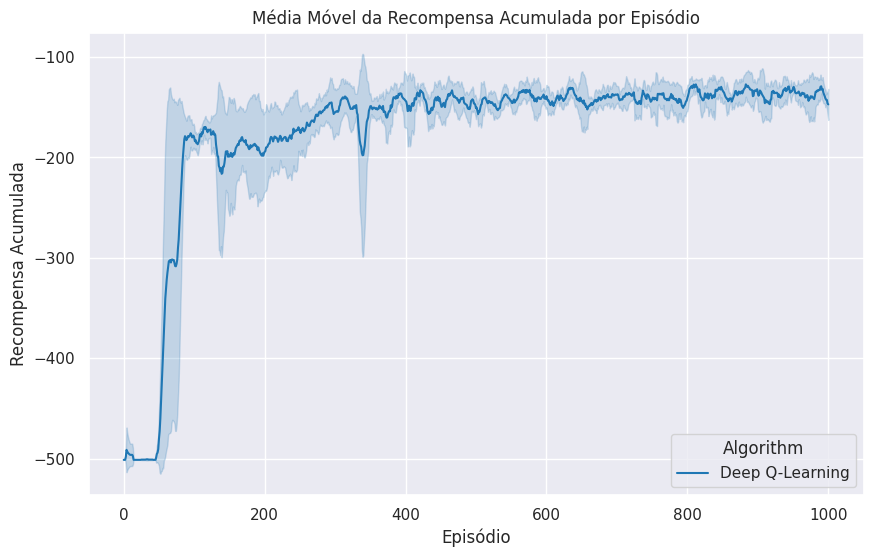

In [10]:
rolling_window = 10  # Média móvel de 100 episódios para deixar o gráfico mais suave

plot_data = []

for algorithm, runs in total_results_deep.items():
    num_runs = len(runs)
    num_timesteps = len(runs[0])
    
    # Monta um dataframe com os resultados de cada episódio para cada algoritmo para ser mais fácil de plotar
    for run_idx in range(num_runs):
        for timestep in range(len(runs[run_idx])):
            plot_data.append({
                "Algorithm": algorithm,
                "Run": run_idx,
                "Timestep": timestep,
                "Value": runs[run_idx][timestep]
            })

df = pd.DataFrame(plot_data)

# calcula a média móvel
df["Smoothed Value"] = df.groupby(["Algorithm", "Run"])["Value"].transform(lambda x: x.rolling(rolling_window, min_periods=1).mean())

sns.set_theme(style="darkgrid", palette="muted")

# Usa os valores e o desvio padrão para plotar a linha e a sombra
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=df,
    x="Timestep",
    y="Smoothed Value",
    hue="Algorithm",
    ci="sd",
    palette="tab10"
)

plt.xlabel("Episódio")
plt.ylabel("Recompensa Acumulada")
plt.title("Média Móvel da Recompensa Acumulada por Episódio")
plt.show()

# **Analyzing Together**

In [16]:
final_results = {"Q-Learning": q_learning_res, "Deep Q-Learning": list(results.values())}

/tmp/ipykernel_33871/3957803657.py:28: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(


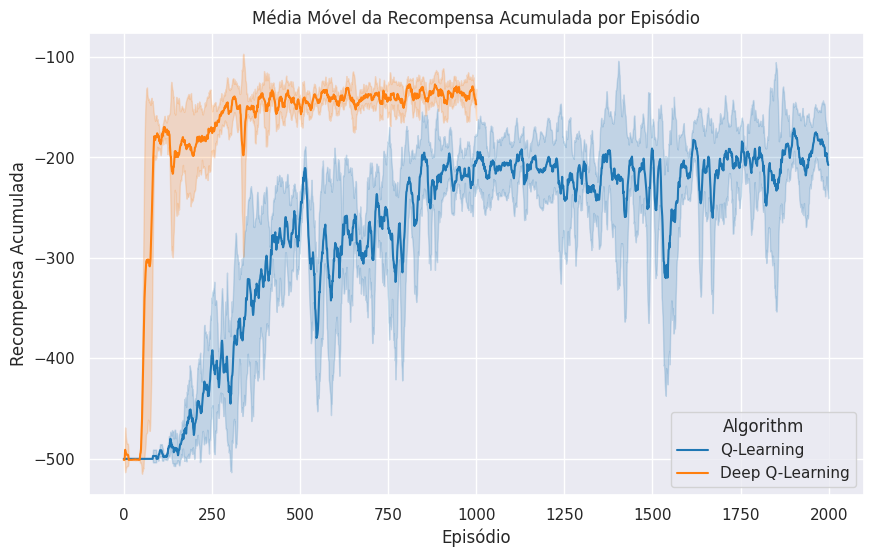

In [23]:
rolling_window = 10  # Média móvel de 100 episódios para deixar o gráfico mais suave

plot_data = []

for algorithm, runs in final_results.items():
    num_runs = len(runs)
    num_timesteps = len(runs[0])
    
    # Monta um dataframe com os resultados de cada episódio para cada algoritmo para ser mais fácil de plotar
    for run_idx in range(num_runs):
        for timestep in range(min(len(runs[run_idx]), 2000)):
            plot_data.append({
                "Algorithm": algorithm,
                "Run": run_idx,
                "Timestep": timestep,
                "Value": runs[run_idx][timestep]
            })

df = pd.DataFrame(plot_data)

# calcula a média móvel
df["Smoothed Value"] = df.groupby(["Algorithm", "Run"])["Value"].transform(lambda x: x.rolling(rolling_window, min_periods=1).mean())

sns.set_theme(style="darkgrid", palette="muted")

# Usa os valores e o desvio padrão para plotar a linha e a sombra
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=df,
    x="Timestep",
    y="Smoothed Value",
    hue="Algorithm",
    ci="sd",
    palette="tab10"
)

plt.xlabel("Episódio")
plt.ylabel("Recompensa Acumulada")
plt.title("Média Móvel da Recompensa Acumulada por Episódio")
plt.show()

# **Testing the Agents**

## Loading Q-Learning Agent

In [24]:
q_learning_agent_test = QLearningMountain(env, **PARAMS)
q_learning_agent_test.load_q_table("logs/q_learning_mountain/exp_4_q_table_20250319161537.npy")

## Loading Deep Q-Learning Agent (NN)

In [26]:
class DQNModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(DQNModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, 256)  # First Dense layer
        self.fc2 = nn.Linear(256, output_dim)  # Output layer

    def forward(self, x):
        x = F.relu(self.fc1(x))
        return self.fc2(x)  # No activation on output (equivalent to linear activation)

    def save(self, filename):
        torch.save(self.state_dict(), filename)

In [33]:
weights = torch.load('data/mountaincar_DeepQLearning.pth')
model = DQNModel(env.observation_space.shape[0], env.action_space.n)
model.load_state_dict(weights)
model.eval()

DQNModel(
  (fc1): Linear(in_features=2, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=3, bias=True)
)

Testing function for the neural network

In [34]:
def test_nn(model, env):
    (state,_) = env.reset()
    state = torch.tensor(state, dtype=torch.float32).unsqueeze(0)

    done = False
    truncated = False
    rewards = 0
    steps = 0
    max_steps = 1300

    while (not done) and (not truncated) and (steps<max_steps):
        Q_values = model(state)
        action = torch.argmax(Q_values).item()
        state, reward, done, truncated, info = env.step(action)
        state = torch.tensor(state, dtype=torch.float32).unsqueeze(0)
        rewards += reward
        env.render()
        steps += 1
    
    return steps, rewards

In [35]:
df_testing = pd.DataFrame(columns=["Algorithm", "Steps", "Total Reward"])

Let's test 100 episodes for each agent and compare the results.

In [36]:
# Roda 100 episódios e salva os resultados para análise
for i in tqdm(range(100)):
    testing_env = gym.make("MountainCar-v0").env
    steps, total_reward = q_learning_agent_test.transform(testing_env, max_steps=MAX_ACTIONS)

    df_testing = pd.concat([df_testing, pd.DataFrame([{"Algorithm": "Q-Learning", "Steps": steps, "Total Reward": total_reward}])], ignore_index=True)

# Roda 100 episódios e salva os resultados para análise
for i in tqdm(range(100)):
    testing_env = gym.make("MountainCar-v0").env
    
    steps, total_reward = test_nn(model, testing_env)

    df_testing = pd.concat([df_testing, pd.DataFrame([{"Algorithm": "Deep Q-Learning", "Steps": steps, "Total Reward": total_reward}])], ignore_index=True)

  0%|          | 0/100 [00:00<?, ?it/s]/tmp/ipykernel_33871/1844977477.py:6: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_testing = pd.concat([df_testing, pd.DataFrame([{"Algorithm": "Q-Learning", "Steps": steps, "Total Reward": total_reward}])], ignore_index=True)
  0%|          | 0/100 [00:00<?, ?it/s]/home/joaolucasmbc/mambaforge/envs/rl/lib/python3.10/site-packages/gymnasium/envs/classic_control/mountain_car.py:179: UserWarning: WARN: You are calling render method without specifying any render mode. You can specify the render_mode at initialization, e.g. gym.make("MountainCar-v0", render_mode="rgb_array")
  gym.logger.warn(
100%|██████████| 100/100 [00:00<00:00, 151.36it/s]


In [37]:
print("Média")
print(df_testing.groupby("Algorithm").mean())
print()
print("Desvio Padrão")
print(df_testing.groupby("Algorithm").std())

Média
                  Steps  Total Reward
Algorithm                            
Deep Q-Learning  135.49       -135.49
Q-Learning       150.03       -150.03

Desvio Padrão
                     Steps  Total Reward
Algorithm                               
Deep Q-Learning  23.525827     23.525827
Q-Learning        9.035793      9.035793


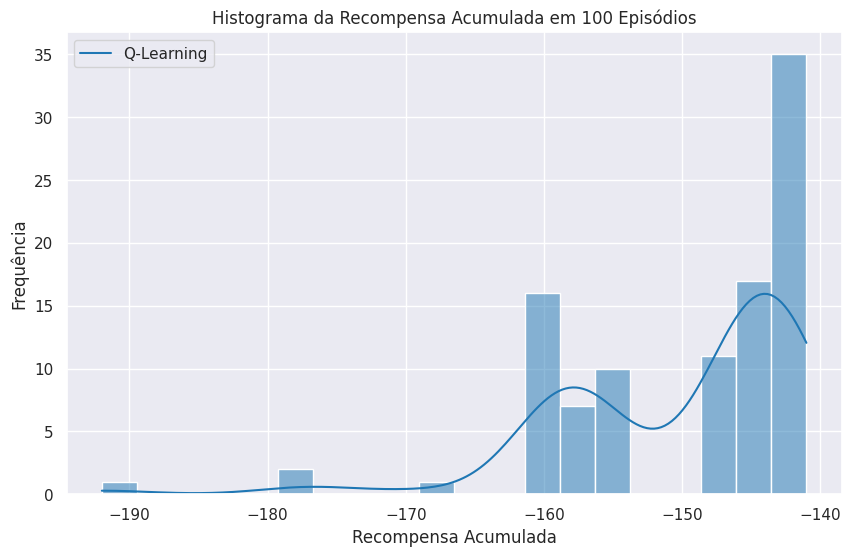

In [38]:
# Graph df_testing to see the rewards and steps
sns.set_theme(style="darkgrid", palette="muted")

plt.figure(figsize=(10, 6))
sns.histplot(data=df_testing[df_testing["Algorithm"] == "Q-Learning"], x="Total Reward", hue="Algorithm", bins=20, kde=True, palette="tab10")

plt.xlabel("Recompensa Acumulada")
plt.ylabel("Frequência")
plt.title("Histograma da Recompensa Acumulada em 100 Episódios")
plt.legend(["Q-Learning"])
plt.show()

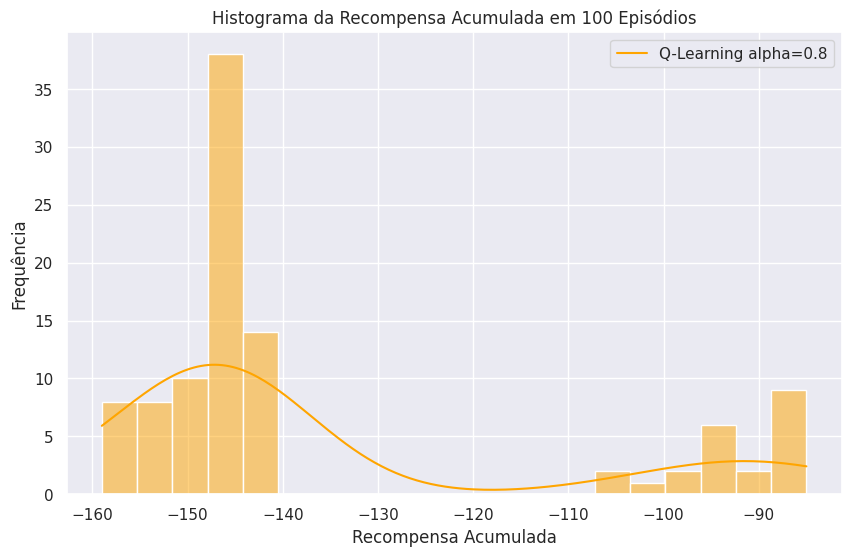

In [39]:
# Graph df_testing to see the rewards and steps
sns.set_theme(style="darkgrid", palette="muted")

plt.figure(figsize=(10, 6))
sns.histplot(data=df_testing[df_testing["Algorithm"] == "Deep Q-Learning"], x="Total Reward", bins=20, kde=True, color="orange")

plt.xlabel("Recompensa Acumulada")
plt.ylabel("Frequência")
plt.title("Histograma da Recompensa Acumulada em 100 Episódios")
plt.legend(["Q-Learning alpha=0.8"])
plt.show()